In [33]:
import numpy as np
import matplotlib.pyplot as plt

x_data=[338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data=[640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
#ydata=b+w*xdata
#338.代表浮点数

x=np.arange(-200,-100,1) #b
y=np.arange(-5,5,0.1) #w
z=np.zeros((len(x),len(y)))#初始化为0，矩阵形状大小为len(x)*len(y)
X,Y=np.meshgrid(x,y)#生成网格坐标

#计算每对（b,w）的函数模型的平均误差
for i in range(len(x)):
    for j in range(len(y)):
        b=x[i]
        w=y[j]
        z[j][i]=0
        for n in range(len(x_data)):
            z[j][i]=z[j][i]+(y_data[n]-b-w*x_data[n])**2
        z[j][i]=z[j][i]/len(x_data)

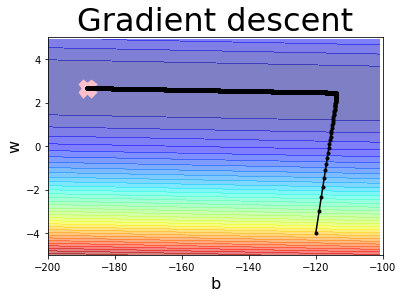

In [34]:
#初始化b,w,lr从该模型开始
b=-120
w=-4
lr=1
iteration=100000
b_history=[b]
w_history=[w]

lr_b=0
lr_w=0
#记录每次梯度下降后选择的b,w便于绘图
for i in range(iteration):
    b_grad=0.0
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad+2.0*(b+w*x_data[n]-y_data[n])
        w_grad=w_grad+2.0*(b+w*x_data[n]-y_data[n])*x_data[n]
    #运用adagrad算法进行梯度下降
    lr_b=lr_b+b_grad**2
    lr_w=lr_w+w_grad**2
    #更新参数b,w
    b=b-lr/np.sqrt(lr_b)*b_grad
    w=w-lr/np.sqrt(lr_w)*w_grad
    
    b_history.append(b)
    w_history.append(w)

#绘图
plt.contourf(x,y,z,50,alpha=0.5,cmap=plt.get_cmap('jet'))#划分成50种，透明度为50%
plt.plot([-188.4],[2.67],'X',ms=15,markeredgewidth=3,color='pink')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.title('Gradient descent',fontsize=32)
plt.xlabel(r'b',fontsize=16)
plt.ylabel(r'w',fontsize=16)
plt.show()


    